In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## saving the wind generation data (the target variable) into dataframes

In [2]:
windgenerationdata = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s. startswith('DE_wind_generation')),
                        parse_dates=[0], index_col=0)

## saving the wind weather data (the features) into dataframes

In [3]:
windspeed = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.startswith('DE_windspeed')),
                parse_dates=[0], index_col=0)

## Next two cells are identical in purpose but if you get a tz-naive error you need to run the other block of code. The block of code needed differs based on system

In [4]:
# start_remove = pd.to_datetime('2016-01-01')
# end_remove = pd.to_datetime('2017-01-01')

# start_test = pd.to_datetime('2015-01-01')
# end_test = pd.to_datetime('2016-01-01')

In [5]:
start_remove = pd.to_datetime('2016-01-01', utc = True)
end_remove = pd.to_datetime('2017-01-01', utc = True)

start_test = pd.to_datetime('2015-01-01', utc = True)
end_test = pd.to_datetime('2016-01-01', utc = True)

## Limiting the data to just data from 2015 & 2016. Only these two years are consistent for most of the regions. Other years may be missing generation data

In [6]:
#creating training data but cutting the data based on time stamp
windspeedformatted = windspeed.loc[(windspeed.index >= start_remove)]
windgenerationdataformatted = windgenerationdata.loc[(windgenerationdata.index >= start_remove) & (windgenerationdata.index < end_remove)]

In [7]:
#creating test/comparison data
windspeedtest = windspeed.loc[(windspeed.index >= start_test) & (windspeed.index < end_test)]
windgenerationtest = windgenerationdata.loc[(windgenerationdata.index >= start_test) & (windgenerationdata.index < end_test)]

## The energy generation data is measured in Mega Watts and even then has a large magnitude. Here changing the magnitude so that it's in Giga Watts

In [8]:
windgenerationdataformatted = windgenerationdataformatted * 1e-3 / 82180000

In [9]:
windgenerationtest = windgenerationtest * 1e-3 / 82180000

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
#attempt at cross validation

# from sklearn.model_selection import cross_val_score

# model = LinearRegression()

# scores_wind = cross_val_score(model, windspeedformatted, windgenerationdataformatted, cv=5)
# print(scores_wind, "\naverage =", np.mean(scores_wind))

In [12]:
# import sklearn.model_selection

# nfold = 10
# kf = sklearn.model_selection.KFold(n_splits = nfold, shuffle = True)

# dtest = np.arange(0, 10)
# nd = len(dtest)

# RSSts = np.zeros((nd, nfold))

# for isplit, Ind in enumerate(kf.split(windspeedformatted)):
#     Itr, Its = Ind
#     xtr = windspeedformatted[Itr]
#     ytr = windgenerationdataformatted[Itr]
#     xts = windspeedformatted[Its]
#     yts = windgenerationdataformatted[Its]
    
#     for it, d in enumerate(dtest):
#         beta_hat = poly.polyfit(xtr, ytr, d)
        
#         yhat = poly.polyval(xts, beta_hat)
#         RSSts[it, isplit] = np.mean((yhat-yts) ** 2)

In [13]:
#function to print out generation averages for hour and day. This is used as a visual representation of the data
#later will throw train data and predicted data to see how they fair
#summing up all the hourly generation numbers to product the total production for the year
#then doing division for the averages
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [14]:
# fitting the model with the features and target variables
model = LinearRegression().fit(windspeedformatted,windgenerationdataformatted)

In [15]:
# using trained model to predict on new set of wind features
prediction = model.predict(windspeedtest)

In [16]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

In [17]:
windgenerationtest = windgenerationtest * 82180000

C:\Users\hong8\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


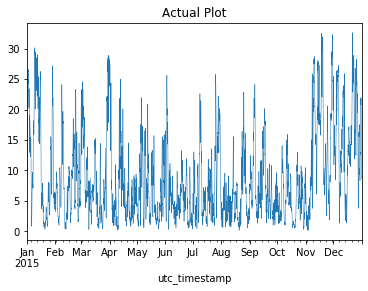

In [18]:
# plotting the actual generation plot
windgenerationtest.plot(linewidth=0.5, title='Actual Plot', legend=False)

In [19]:
prediction = prediction * 82180000

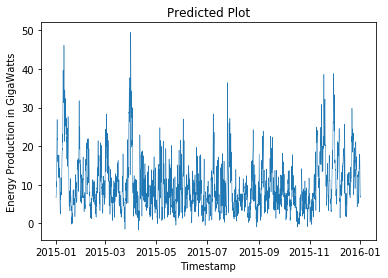

In [20]:
#plotting the predicted values
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [21]:
print(r2_score(windgenerationtest, prediction))

0.7393959896247212


In [22]:
print(mean_squared_error(windgenerationtest, prediction))

13.351482541491032


In [23]:
energy_production(windgenerationtest)

Energy Data measured in Giga Watts
Total energy: DE_wind_generation_actual    77468.975
dtype: float64
Average Energy Per Hour: DE_wind_generation_actual    8.84349
dtype: float64
Average Energy Per Day: DE_wind_generation_actual    212.243767
dtype: float64


In [24]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 87293.07681968139
Average Energy Per Hour: 9.964963107269565
Average Energy Per Day: 239.15911457446956
